In [7]:
!pip install textblob
!pip install wordcloud

In [1]:
import pandas as pd
import numpy as np
import string

# NLP
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer, SnowballStemmer
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import re 
from textblob import TextBlob, Word
from wordcloud import WordCloud

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline 

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold, cross_val_score

import string

In [2]:
df = pd.read_csv('../../../data/reviews.csv')

In [3]:
df

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1
...,...,...,...,...,...
17489,25535,EverQuest II,2012.0,Arguably the single greatest mmorp that exists...,1
17490,25536,EverQuest II,2017.0,"An older game, to be sure, but has its own cha...",1
17491,25537,EverQuest II,2011.0,When I frist started playing Everquest 2 it wa...,1
17492,25538,EverQuest II,NaN,cool game. THe only thing that REALLY PISSES M...,1


In [4]:
df.isna().sum()

review_id            0
title                0
year               178
user_review          0
user_suggestion      0
dtype: int64

In [6]:
df.describe()

,review_id,year,user_suggestion
count,17494.000000,17316.000000,17494.000000
mean,12423.216989,2016.388427,0.569795
std,7653.367660,1.390356,0.495119
min,1.000000,2011.000000,0.000000
25%,5769.250000,2015.000000,0.000000
50%,11756.500000,2017.000000,1.000000
75%,18926.750000,2018.000000,1.000000
max,25539.000000,2018.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17494 entries, 0 to 17493
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        17494 non-null  int64  
 1   title            17494 non-null  object 
 2   year             17316 non-null  float64
 3   user_review      17494 non-null  object 
 4   user_suggestion  17494 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 683.5+ KB


In [8]:
df['lower_review'] = df['user_review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['lower_review'].head()

0    i'm scared and hearing creepy voices. so i'll ...
1    best game, more better than sam pepper's youtu...
2    a littly iffy on the controls, but once you kn...
3    great game, fun and colorful and all that.a si...
4    not many games have the cute tag right next to...
Name: lower_review, dtype: object

In [9]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gnr40\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
def clean_reviews(review):
    review = "".join([word.lower() for word in review if word not in string.punctuation])
    tokens = re.split('\W+', review)
    review = [wn.lemmatize(word) for word in tokens if word not in stopwords]
    return review

df['review_clean'] = df['lower_review'].apply(lambda x: clean_reviews(x))



In [12]:
df

,review_id,title,year,user_review,user_suggestion,lower_review,review_clean
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1,i'm scared and hearing creepy voices. so i'll ...,"[im, scared, hearing, creepy, voice, ill, paus..."
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1,"best game, more better than sam pepper's youtu...","[best, game, better, sam, pepper, youtube, acc..."
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1,"a littly iffy on the controls, but once you kn...","[littly, iffy, control, know, play, easy, mast..."
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1,"great game, fun and colorful and all that.a si...","[great, game, fun, colorful, thata, side, note..."
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1,not many games have the cute tag right next to...,"[many, game, cute, tag, right, next, horror, t..."
...,...,...,...,...,...,...,...
17489,25535,EverQuest II,2012.0,Arguably the single greatest mmorp that exists...,1,arguably the single greatest mmorp that exists...,"[arguably, single, greatest, mmorp, exists, to..."
17490,25536,EverQuest II,2017.0,"An older game, to be sure, but has its own cha...",1,"an older game, to be sure, but has its own cha...","[older, game, sure, charm, hold, special, plac..."
17491,25537,EverQuest II,2011.0,When I frist started playing Everquest 2 it wa...,1,when i frist started playing everquest 2 it wa...,"[frist, started, playing, everquest, 2, amazin..."
17492,25538,EverQuest II,NaN,cool game. THe only thing that REALLY PISSES M...,1,cool game. the only thing that really pisses m...,"[cool, game, thing, really, piss, ridable, tra..."


In [13]:
df['user_suggestion'].value_counts()

1    9968
0    7526
Name: user_suggestion, dtype: int64

In [16]:
thumbs_up_df = df[df['user_suggestion']==1]

In [17]:
thumbs_down_df = df[df['user_suggestion']==0]

In [23]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gnr40\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gnr40\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

<AxesSubplot:title={'center':'Parts of Speech in Good Reviews'}>

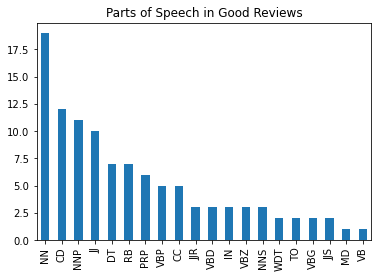

In [27]:
good_blob = TextBlob(str(thumbs_up_df['user_review']))
good_pos_df = pd.DataFrame(good_blob.tags, columns = ['word' , 'pos'])
good_pos_df = good_pos_df.pos.value_counts()[:20]
good_pos_df.plot(kind='bar', title="Parts of Speech in Good Reviews" )

<AxesSubplot:title={'center':'Parts of Speech in Negative Reviews'}>

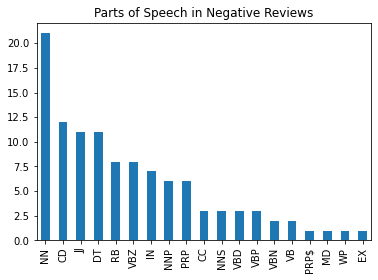

In [28]:
neg_blob = TextBlob(str(thumbs_down_df['user_review']))
neg_pos_df = pd.DataFrame(neg_blob.tags, columns = ['word' , 'pos'])
neg_pos_df = neg_pos_df.pos.value_counts()[:20]
neg_pos_df.plot(kind='bar', title="Parts of Speech in Negative Reviews" )

In [31]:
tfidf_vect = TfidfVectorizer(analyzer=clean_reviews)
X_tfidf = tfidf_vect.fit_transform(df['user_review'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(17494, 82263)
['', '0', '00', '000', '0000', '00000', '000001', '00001', '00002', '0001', '00012', '0008', '000euros', '001', '0010', '00110community', '004', '007', '00th', '01', '010', '0100', '010characters', '010controlls', '010cuisne', '010gameplay', '010i', '010sound', '010ui', '010update', '011730', '012hrs', '014', '015each', '016', '01742', '02', '02042018', '0205ms', '0210', '02112017score', '0248', '025100', '025update', '0292', '03', '030617', '0337', '033fdcd0c9b611e8893d4ccc6affc842jsonsoftware', '034482758621', '03hrs', '04', '04052015short', '04102018the', '04112017firstly', '041217all', '04devs', '04hourshalf', '05', '050', '0510', '052', '052m', '054', '05beautiful', '05euro', '05hard', '05k', '05seconds', '06', '06082018ive', '06082018the', '06282017', '0630', '07', '0700', '07042018', '070715', '070716', '07092018cheaters', '075', '07and', '07game', '08', '0815kost', '082718', '08salso', '09', '0900', '092016', '092516fractured', '099', '09joe', '0enjoyed', '0hmago

In [36]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
X_tfidf_df.head()

,,0,00,000,0000,00000,000001,00001,00002,0001,...,현질유도는,현질유도도,혹은,혼자서,황망한,황무지,ﾉ,ﾉಥдಥﾉ,ﾌﾌ,ﾚ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df['review_len'] = df['user_review'].apply(lambda x: len(x) - x.count(" ")) #subtracting whitespace
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17494 entries, 0 to 17493
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        17494 non-null  int64  
 1   title            17494 non-null  object 
 2   year             17316 non-null  float64
 3   user_review      17494 non-null  object 
 4   user_suggestion  17494 non-null  int64  
 5   lower_review     17494 non-null  object 
 6   review_clean     17494 non-null  object 
 7   review_len       17494 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 1.1+ MB


In [33]:
df

,review_id,title,year,user_review,user_suggestion,lower_review,review_clean,review_len
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1,i'm scared and hearing creepy voices. so i'll ...,"[im, scared, hearing, creepy, voice, ill, paus...",575
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1,"best game, more better than sam pepper's youtu...","[best, game, better, sam, pepper, youtube, acc...",292
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1,"a littly iffy on the controls, but once you kn...","[littly, iffy, control, know, play, easy, mast...",328
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1,"great game, fun and colorful and all that.a si...","[great, game, fun, colorful, thata, side, note...",234
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1,not many games have the cute tag right next to...,"[many, game, cute, tag, right, next, horror, t...",267
...,...,...,...,...,...,...,...,...
17489,25535,EverQuest II,2012.0,Arguably the single greatest mmorp that exists...,1,arguably the single greatest mmorp that exists...,"[arguably, single, greatest, mmorp, exists, to...",810
17490,25536,EverQuest II,2017.0,"An older game, to be sure, but has its own cha...",1,"an older game, to be sure, but has its own cha...","[older, game, sure, charm, hold, special, plac...",1204
17491,25537,EverQuest II,2011.0,When I frist started playing Everquest 2 it wa...,1,when i frist started playing everquest 2 it wa...,"[frist, started, playing, everquest, 2, amazin...",1331
17492,25538,EverQuest II,NaN,cool game. THe only thing that REALLY PISSES M...,1,cool game. the only thing that really pisses m...,"[cool, game, thing, really, piss, ridable, tra...",219


In [34]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3) * 100

df['percent_punct'] = df['user_review'].apply(lambda x: count_punct(x))
df.head()

,review_id,title,year,user_review,user_suggestion,lower_review,review_clean,review_len,percent_punct
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1,i'm scared and hearing creepy voices. so i'll ...,"[im, scared, hearing, creepy, voice, ill, paus...",575,4.3
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1,"best game, more better than sam pepper's youtu...","[best, game, better, sam, pepper, youtube, acc...",292,7.9
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1,"a littly iffy on the controls, but once you kn...","[littly, iffy, control, know, play, easy, mast...",328,4.9
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1,"great game, fun and colorful and all that.a si...","[great, game, fun, colorful, thata, side, note...",234,7.7
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1,not many games have the cute tag right next to...,"[many, game, cute, tag, right, next, horror, t...",267,2.2


In [ ]:
new_features_df = df[]

In [ ]:
X_tfidf_df.reset_index(drop=True, inplace=True)
new_features_df.reset_index(drop=True, inplace=True)

In [38]:
full_df = pd.concat([df, X_tfidf_df], axis=1)
full_df.head()

,review_id,title,year,user_review,user_suggestion,lower_review,review_clean,review_len,percent_punct,,...,현질유도는,현질유도도,혹은,혼자서,황망한,황무지,ﾉ,ﾉಥдಥﾉ,ﾌﾌ,ﾚ
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1,i'm scared and hearing creepy voices. so i'll ...,"[im, scared, hearing, creepy, voice, ill, paus...",575,4.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1,"best game, more better than sam pepper's youtu...","[best, game, better, sam, pepper, youtube, acc...",292,7.9,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1,"a littly iffy on the controls, but once you kn...","[littly, iffy, control, know, play, easy, mast...",328,4.9,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1,"great game, fun and colorful and all that.a si...","[great, game, fun, colorful, thata, side, note...",234,7.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1,not many games have the cute tag right next to...,"[many, game, cute, tag, right, next, horror, t...",267,2.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


MemoryError: Unable to allocate 10.7 GiB for an array with shape (82265, 17494) and data type float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(, new_features_df['alignment'], test_size=0.3)